# Dogs vs Cat Redux

In this tutorial, you will learn how generate and submit predictions to a Kaggle competiton

[Dogs vs. Cats Redux: Kernels Edition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)
    
    

In [27]:
from datetime import datetime

In [1]:
#Verify we are in the lesson1 directory
%pwd

u'/home/ubuntu/fastai/fastai_bmt_reworking/dogsCats'

In [2]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
#DATA_HOME_DIR = current_dir+'/data/redux'

In [3]:
#Allow relative imports to directories above lesson1/
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [4]:
HOMEPATH = "/home/ubuntu/fastai/"
DATA_HOME_DIR = HOMEPATH + "data/dogscats/"

In [5]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
#import modules
from utils import *
from vgg16 import Vgg16

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

('os.getcwd:', '/home/ubuntu/fastai')


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
Using TensorFlow backend.


## Action Plan
1. Create Validation and Sample sets
2. Rearrange image files into their respective directories 
3. Finetune and Train model
4. Generate predictions
5. Validate predictions
6. Submit predictions to Kaggle

## Create validation set and sample

In [6]:
print (DATA_HOME_DIR)
%ls $DATA_HOME_DIR

/home/ubuntu/fastai/data/dogscats/
results/  sample_submission.csv  test/     train/     valid/
sample/   submission1.csv        test.zip  train.zip


In [7]:
print (DATA_HOME_DIR)
%ls $DATA_HOME_DIR

/home/ubuntu/fastai/data/dogscats/
results/  sample_submission.csv  test/     train/     valid/
sample/   submission1.csv        test.zip  train.zip


In [8]:
%cd $DATA_HOME_DIR/train

/home/ubuntu/fastai/data/dogscats/train


In [10]:
from shutil import copyfile

In [11]:
print (os.getcwd())

/home/ubuntu/fastai/data/dogscats/train


In [13]:
%cd $DATA_HOME_DIR/valid

/home/ubuntu/fastai/data/dogscats/valid


## Rearrange image files into their respective directories

In [15]:
DATA_HOME_DIR

'/home/ubuntu/fastai/data/dogscats/'

In [16]:

#when done there should be zero files left in train 
DIR = DATA_HOME_DIR+'valid/'
print "after move: # files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'valid/cats/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'valid/dogs/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

after move: # files in  /home/ubuntu/fastai/data/dogscats/valid/ 0
# files in  /home/ubuntu/fastai/data/dogscats/valid/cats/ 976
# files in  /home/ubuntu/fastai/data/dogscats/valid/dogs/ 1024


In [17]:
#Divide cat/dog images into separate directories
#when done there should be zero files left in train 
DIR = DATA_HOME_DIR+'sample/train/'
print "after move: # files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'sample/train/cats/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'sample/train/dogs/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

after move: # files in  /home/ubuntu/fastai/data/dogscats/sample/train/ 0
# files in  /home/ubuntu/fastai/data/dogscats/sample/train/cats/ 98
# files in  /home/ubuntu/fastai/data/dogscats/sample/train/dogs/ 102


In [18]:
#when done there should be zero files left in train 
DIR = DATA_HOME_DIR+'sample/valid/'
print "after move: # files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'sample/valid/cats/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'sample/valid/dogs/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])


after move: # files in  /home/ubuntu/fastai/data/dogscats/sample/valid/ 0
# files in  /home/ubuntu/fastai/data/dogscats/sample/valid/cats/ 24
# files in  /home/ubuntu/fastai/data/dogscats/sample/valid/dogs/ 26


In [19]:
#when done there should be zero files left in train 
DIR = DATA_HOME_DIR+'sample/train/'
print "after move: # files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'sample/train/cats/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'sample/train/dogs/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])


after move: # files in  /home/ubuntu/fastai/data/dogscats/sample/train/ 0
# files in  /home/ubuntu/fastai/data/dogscats/sample/train/cats/ 98
# files in  /home/ubuntu/fastai/data/dogscats/sample/train/dogs/ 102


In [20]:
#when done there should be zero files left in train 
DIR = DATA_HOME_DIR+'test/'
print "after move: # files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
DIR = DATA_HOME_DIR+'test/unknown/'
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])


#NB: need test files in subdir unknown so when loaded they are put in a class by the loader.

after move: # files in  /home/ubuntu/fastai/data/dogscats/test/ 0
# files in  /home/ubuntu/fastai/data/dogscats/test/unknown/ 12500


## Finetuning and Training

In [21]:
DATA_HOME_DIR

'/home/ubuntu/fastai/data/dogscats/'

In [22]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR                    #use this when all code tested and ready for longer run
#path = DATA_HOME_DIR + 'sample/'         #use this during development - smaller dataset
test_path = DATA_HOME_DIR + 'test/'      #We use all the test data
results_path=DATA_HOME_DIR + 'results/'  #results always in this directory.
train_path=path + 'train/'
valid_path=path + 'valid/'
print "path:", path
print "test_path:", test_path
print "results_path:", results_path
print "train_path:", train_path
print "valid_path:", valid_path


/home/ubuntu/fastai/data/dogscats
path: /home/ubuntu/fastai/data/dogscats/
test_path: /home/ubuntu/fastai/data/dogscats/test/
results_path: /home/ubuntu/fastai/data/dogscats/results/
train_path: /home/ubuntu/fastai/data/dogscats/train/
valid_path: /home/ubuntu/fastai/data/dogscats/valid/


In [23]:
#import Vgg16 helper class
vgg = Vgg16()

In [24]:
print type(vgg)

<type 'instance'>


In [30]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=64
no_of_epochs=10

In [28]:
startTime= datetime.now()
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Time elpased (hh:mm:ss.ms) 0:00:00.501321


In [29]:
startTime= datetime.now()
vgg.finetune(batches)
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.001

Time elpased (hh:mm:ss.ms) 0:00:00.035454


In [31]:
print "no_of_epochs:", no_of_epochs
print os.getcwd()
print "results_path:", results_path
DIR = results_path
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])


no_of_epochs: 10
/home/ubuntu/fastai/data/dogscats
results_path: /home/ubuntu/fastai/data/dogscats/results/
# files in  /home/ubuntu/fastai/data/dogscats/results/ 3


In [32]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
startTime= datetime.now()
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    #save weights once at end, otherwise too much disc space used.
    #todo: make backup for last two files only. use for long runs.
    #vgg.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))
vgg.model.save_weights(results_path+latest_weights_filename)

#sample data takes approx 16s/epoch

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 473s - loss: 0.4318 - acc: 0.8705 - val_loss: 0.2695 - val_acc: 0.9125
Running epoch: 1
Epoch 1/1
23000/23000 [==============================] - 451s - loss: 0.3434 - acc: 0.8928 - val_loss: 0.2340 - val_acc: 0.9180
Running epoch: 2
Epoch 1/1
23000/23000 [==============================] - 451s - loss: 0.3504 - acc: 0.8952 - val_loss: 0.2268 - val_acc: 0.9235
Running epoch: 3
Epoch 1/1
23000/23000 [==============================] - 446s - loss: 0.3436 - acc: 0.8932 - val_loss: 0.2179 - val_acc: 0.9240
Running epoch: 4
Epoch 1/1
23000/23000 [==============================] - 446s - loss: 0.3510 - acc: 0.8922 - val_loss: 0.2325 - val_acc: 0.9240
Running epoch: 5
Epoch 1/1
23000/23000 [==============================] - 447s - loss: 0.3519 - acc: 0.8961 - val_loss: 0.2612 - val_acc: 0.9150
Running epoch: 6
Epoch 1/1
23000/23000 [==============================] - 447s - loss: 0.3635 - acc: 0.8923 - val_loss: 0.2570 - v

In [67]:
DIR = results_path
print "# files in ", DIR, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])


# files in  /home/ubuntu/fastai/data/dogscats/results/ 10


## Generate Predictions

Let's use our new model to make predictions on the test dataset

In [68]:
print "test_path:", test_path

test_path: /home/ubuntu/fastai/data/dogscats/test/


In [69]:
startTime= datetime.now()
batches, preds = vgg.test(test_path, batch_size = batch_size*2)
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))


Found 12500 images belonging to 1 classes.
Time elpased (hh:mm:ss.ms) 0:03:31.402893


In [70]:
print "batches:", type(batches)
print "preds:", type(preds), preds.shape

batches: <class 'keras.preprocessing.image.DirectoryIterator'>
preds: <type 'numpy.ndarray'> (12500, 2)


In [71]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
print preds[:5]

filenames = batches.filenames
print filenames[:5]

[[  9.9882e-01   1.1761e-03]
 [  1.6799e-06   1.0000e+00]
 [  2.0105e-04   9.9980e-01]
 [  9.8227e-01   1.7729e-02]
 [  9.9976e-01   2.4043e-04]]
['unknown/2957.jpg', 'unknown/11706.jpg', 'unknown/10629.jpg', 'unknown/9810.jpg', 'unknown/9834.jpg']


unknown/2957.jpg


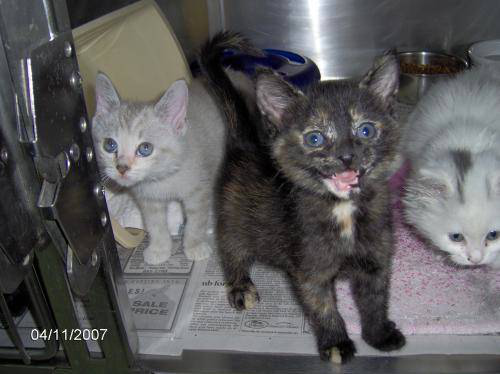

In [72]:
#You can verify the column ordering by viewing some images
from PIL import Image
print filenames[0]
Image.open(test_path + filenames[0])

unknown/11706.jpg


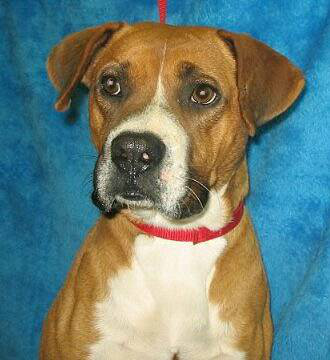

In [73]:
print filenames[1]
Image.open(test_path + filenames[1])

unknown/10629.jpg


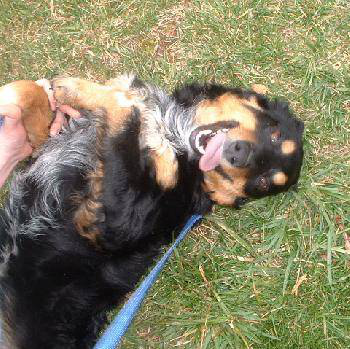

In [74]:
print filenames[2]
Image.open(test_path + filenames[2])

In [75]:
'''
for i in range(0,preds.shape[0]):
    if preds[i,0]<0.1:
        print "at i=", i, preds[i]
    #print i, preds[i], preds[i,0]
    if i >= 200: break
print "end"
'''

'\nfor i in range(0,preds.shape[0]):\n    if preds[i,0]<0.1:\n        print "at i=", i, preds[i]\n    #print i, preds[i], preds[i,0]\n    if i >= 200: break\nprint "end"\n'

In [76]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

## Validate Predictions

Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting. 

- **Tip**: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

Let's see what we can learn from these examples. (In general, this is a particularly useful technique for debugging problems in the model. However, since this model is so simple, there may not be too much to learn at this stage.)

Calculate predictions on validation set, so we can find correct and incorrect examples:

In [77]:
vgg.model.load_weights(results_path+latest_weights_filename)

In [78]:
print "valid_path:", valid_path

valid_path: /home/ubuntu/fastai/data/dogscats/valid/


In [79]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [80]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [81]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

In [82]:
print type(our_labels), our_labels.shape
print type(expected_labels), expected_labels.shape

<type 'numpy.ndarray'> (2000,)
<type 'numpy.ndarray'> (2000,)


Found 1847 correct labels


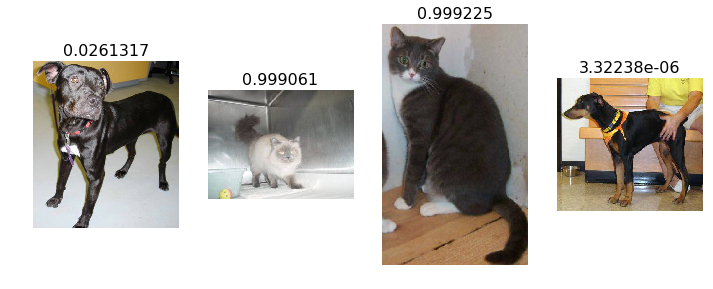

In [83]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 153 incorrect labels


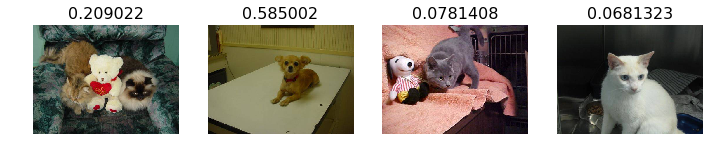

In [84]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 921 confident correct cats labels


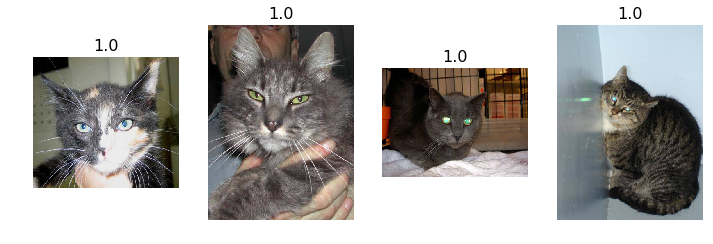

In [85]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print "Found %d confident correct cats labels" % len(correct_cats)
if len(correct_cats)!=0:
    most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
    plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])
else:
    print "zero confident cats. SOMETHING WRONG!!!"

Found 926 confident correct dogs labels


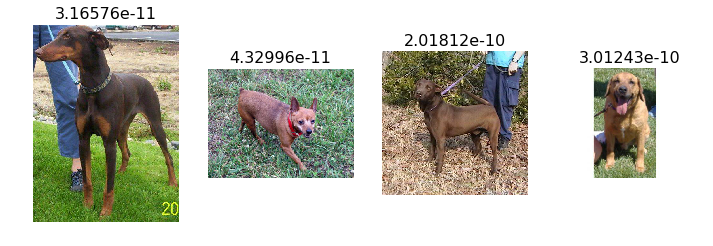

In [86]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print "Found %d confident correct dogs labels" % len(correct_dogs)
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

Found 98 incorrect cats


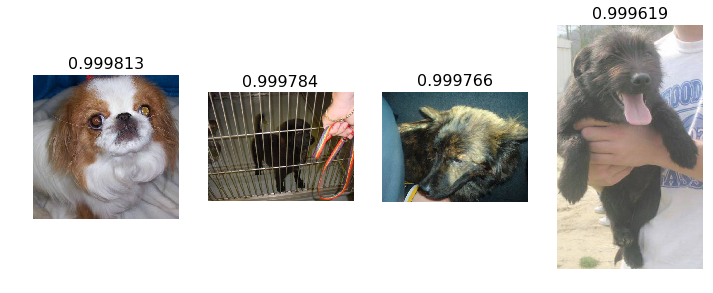

In [87]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

Found 55 incorrect dogs


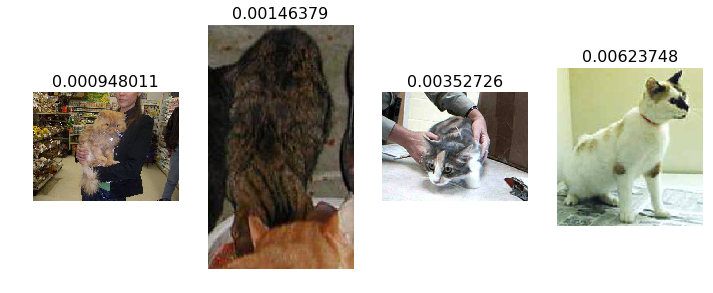

In [88]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print "Found %d incorrect dogs" % len(incorrect_dogs)
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

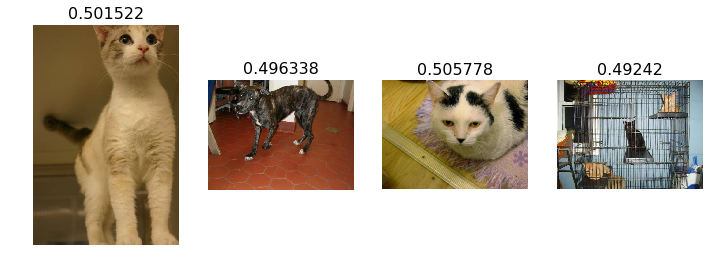

In [89]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

Perhaps the most common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[921  55]
 [ 98 926]]


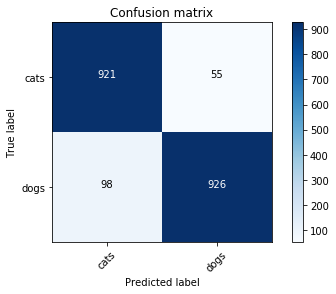

In [91]:
plot_confusion_matrix(cm, val_batches.class_indices)

## Submit Predictions to Kaggle!

Here's the format Kaggle requires for new submissions:
```
imageId,isDog
1242, .3984
3947, .1000
4539, .9082
2345, .0000
```

Kaggle wants the imageId followed by the probability of the image being a dog. Kaggle uses a metric called [Log Loss](http://wiki.fast.ai/index.php/Log_Loss) to evaluate your submission.

In [92]:
#Load our test predictions from file
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [93]:
#Grab the dog prediction column
isdog = preds[:,1]
print "Raw Predictions: " + str(isdog[:5])
print "Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)])
print "Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)])

Raw Predictions: [  1.1761e-03   1.0000e+00   9.9980e-01   1.7729e-02   2.4043e-04]
Mid Predictions: [ 0.4453  0.5435  0.5256  0.5228  0.5153  0.5279  0.5113  0.4064  0.5525  0.406   0.4832  0.4368
  0.5804  0.5995  0.5857  0.5607  0.4432  0.5911  0.4169  0.5592  0.4955  0.4858  0.4267  0.5684
  0.483   0.5108  0.4045  0.4719  0.4029  0.4316  0.5934  0.577   0.5373  0.5543  0.4348  0.5223
  0.4625  0.5816  0.4395  0.4026  0.4794  0.4767  0.4318  0.5293  0.4039  0.4734  0.5289  0.4233
  0.5133  0.5853  0.4091  0.4124  0.4984  0.4011  0.5607  0.528   0.4464  0.4144  0.5317  0.5669
  0.47    0.58    0.4636  0.5543  0.494   0.4105  0.4432  0.4628  0.4505  0.4988  0.5785  0.4009
  0.5919  0.48    0.5626  0.4774  0.5373  0.5184  0.5093  0.4707  0.4944  0.4682  0.4862  0.5675
  0.4664  0.5058  0.5061  0.4086  0.4558  0.5067  0.4303  0.5495  0.4927  0.4642  0.5133  0.4227
  0.5809  0.5276  0.4823  0.4845  0.5502  0.5228  0.5133  0.4318  0.445   0.5426  0.4307  0.4964
  0.5517  0.5808  0.4965  

[Log Loss](http://wiki.fast.ai/index.php/Log_Loss) doesn't support probability values of 0 or 1--they are undefined (and we have many). Fortunately, Kaggle helps us by offsetting our 0s and 1s by a very small value. So if we upload our submission now we will have lots of .99999999 and .000000001 values. This seems good, right?

Not so. There is an additional twist due to how log loss is calculated--log loss rewards predictions that are confident and correct (p=.9999,label=1), but it punishes predictions that are confident and wrong far more (p=.0001,label=1). See visualization below.

In [94]:
#Visualize Log Loss when True value = 1
#y-axis is log loss, x-axis is probabilty that label = 1
#As you can see Log Loss increases rapidly as we approach 0
#But increases slowly as our predicted probability gets closer to 1

#this keeps throwing error. find fix later.
'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

x = [i*.0001 for i in range(1,10000)]
y = [log_loss([1],[[i*.0001,1-(i*.0001)]],eps=1e-15) for i in range(1,10000,1)]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom sklearn.metrics import log_loss\n\nx = [i*.0001 for i in range(1,10000)]\ny = [log_loss([1],[[i*.0001,1-(i*.0001)]],eps=1e-15) for i in range(1,10000,1)]\n\nplt.plot(x, y)\nplt.axis([-.05, 1.1, -.8, 10])\nplt.title("Log Loss when true label = 1")\nplt.xlabel("predicted probability")\nplt.ylabel("log loss")\n\nplt.show()\n'

In [95]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
isdog = isdog.clip(min=0.05, max=0.95)

In [96]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

Here we join the two columns into an array of [imageId, isDog]

In [97]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  2.9570e+03,   5.0000e-02],
       [  1.1706e+04,   9.5000e-01],
       [  1.0629e+04,   9.5000e-01],
       [  9.8100e+03,   5.0000e-02],
       [  9.8340e+03,   5.0000e-02]])

In [98]:
%cd $DATA_HOME_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/home/ubuntu/fastai/data/dogscats


In [99]:
DATA_HOME_DIR

'/home/ubuntu/fastai/data/dogscats/'

In [100]:
from IPython.display import FileLink
#%cd $LESSON_HOME_DIR
#FileLink('data/redux/'+submission_file_name)
FileLink(submission_file_name)

/home/ubuntu/fastai/data/dogscats/submission1.csv

You can download this file and submit on the Kaggle website or use the Kaggle command line tool's "submit" method.

In [101]:
#kg submit <submission-file> -u <username> -p <password> -c <competition> -m "<message>"
#basic               : loss: 1.4772 - acc: 0.8954 - val_loss: 0.8845 - val_acc: 0.9335
#this=basic+10 epochs: loss: 0.3643 - acc: 0.8952 - val_loss: 0.2227 - val_acc: 0.9225
#submitted xx-11-2017 score 0.xxx position ~ zzz out of ~1350. accuracy recorded 